<a href="https://colab.research.google.com/github/manisankar29/CODSOFT/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task1**

# **MOVIE GENRE CLASSIFICATION**

## **Importing required libraries**

In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 923.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=ee38cf290fe3b9cc7f554ad2c2e0e051df23a7a8ca5bd5a94beaf9c74fdc0272
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=177bfad6de0e47358bc733706e9409949d9ada169f9cb188351c1e4904ba83ea
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 35.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import nltk
import re
import string
import pycountry
from time import time
from googletrans import Translator
from langdetect import detect
print(os.listdir())
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## **Importing and understanding datasets**

In [ ]:
train_data = pd.read_csv(r'/content/drive/MyDrive/Datasets/Genre Classification Dataset/train_data.txt',
                   sep=':::',
                   names=['Title', 'Genre', 'Description']).reset_index(drop=True)

### Printing out few columns

In [ ]:
train_data.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data = pd.read_csv(r'/content/drive/MyDrive/Datasets/Genre Classification Dataset/test_data.txt',
                   sep=':::',
                   names=['Title', 'Description']).reset_index(drop=True)

### Printing out few columns

In [ ]:
test_data.head()

,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


### For Training Data

In [ ]:
train_data.describe(include='object')

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
train_data.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.Genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

### For Testing Data

In [ ]:
test_data.describe(include='object')

,Title,Description
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [ ]:
test_data.isna().sum()

Title          0
Description    0
dtype: int64

In [ ]:
test_data.duplicated().sum()

0

## **Exploratory Data Analysis**

### Text cleaning

In [ ]:
train_data.loc[train_data['Description'].str.contains(r'@\S+')].head()

,Title,Genre,Description
242,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


We discover the existence of multiple languages, so we need to handle these languages.

### Discovering different languages

In [ ]:
def detect_lang(text):
  try:
    return pycountry.languages.get(alpha_2=detect(text)).name.lower()
  except:
    return 'Unknown'

train_data['Language'] = train_data['Description'].apply(detect_lang)
test_data['Language'] = test_data['Description'].apply(detect_lang)

In [ ]:
train_data.head()

,Title,Genre,Description,Language
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,english
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,english
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,english
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,english
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,english


In [ ]:
test_data.head()

,Title,Description,Language
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",english
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",english
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,english
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",english
4,Er nu zhai (1955),Before he was known internationally as a mart...,english


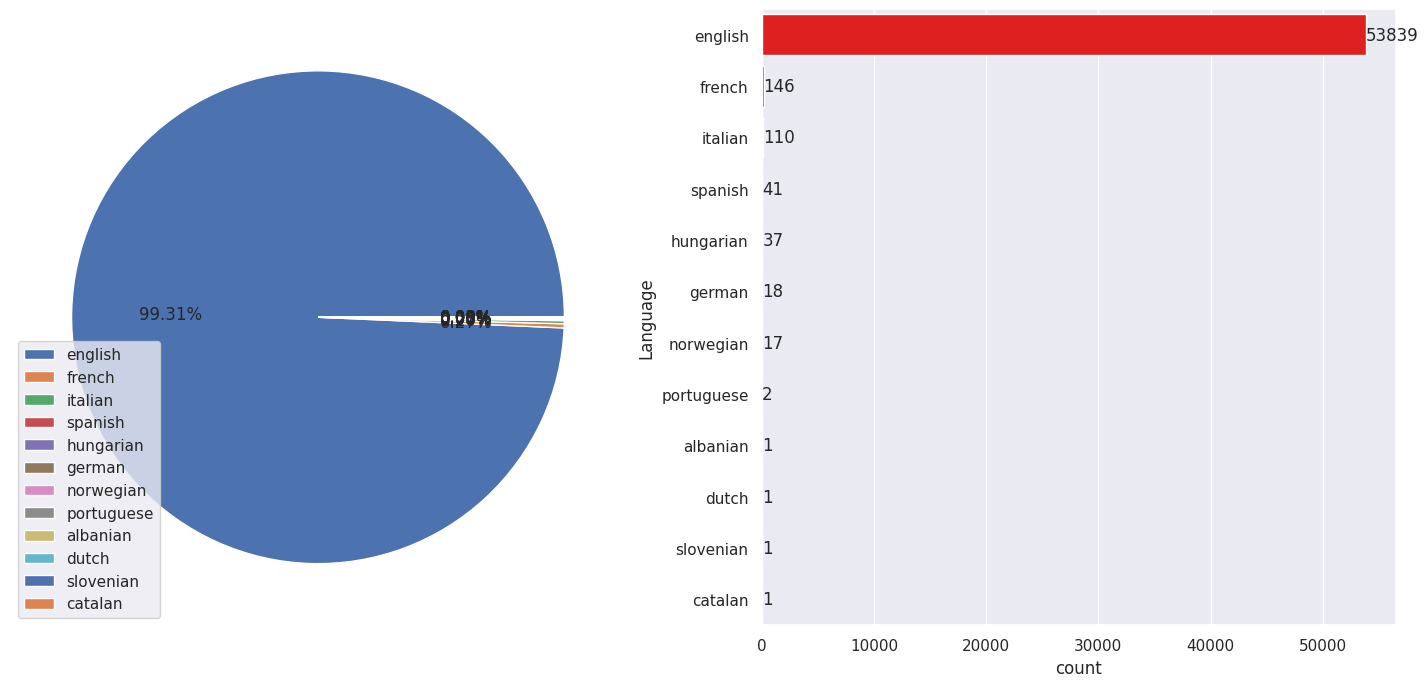

In [ ]:
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
fig, axs = plt.subplots(1,2)
axs[0].pie(train_data.Language.value_counts().values.tolist(),autopct='%.2f%%')
axs[0].legend(labels=train_data.Language.value_counts().index.tolist(),loc='lower left')
sns.countplot(data=train_data,y='Language',order=train_data.Language.value_counts().index.tolist(),ax=axs[1],color='red')
axs[1].bar_label(axs[1].containers[0])
fig.show()

### Cleaning text

In [ ]:
def clean_text(text):
  text = re.sub('Mail <svaradi@sprynet.com> for translation.','',text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(f'[{string.punctuation}]', '', text)
  text = re.sub(f'[{string.digits}]', '', text)
  text = re.sub(r'\s+[a-zA-Z]\s+', '', text)
  return text

The above function 'clean_text' removes strange patterns, twitter handles, HTTP content, punctuations, numbers, and single characters from the text.

In [ ]:
train_data['Description'] = train_data['Description'].apply(clean_text)
test_data['Description'] = test_data['Description'].apply(clean_text)

### Checking out languages other than english

In [ ]:
train_data[~train_data.Language.isin(['english'])]

,Title,Genre,Description,Language
210,Divorzio alla siciliana (1963),comedy,Il barone Fifě ha bisogno di un erede per ave...,italian
242,Túlvilági beszélö (1992),documentary,Tollas Tibor az os fordulatot kovetoen katon...,hungarian
282,"""Boogie-woogie 47"" (1980)",drama,En plusieurs familles de Montréal passent lé...,french
678,Pallati 176 (1986),comedy,Englishcomedy by wellknown Albanian theaterco...,albanian
806,Iszony (1965),drama,Mail to author for translation Karasz Nelli a...,hungarian
...,...,...,...,...
53697,Fantasmi e ladri (1959),comedy,Annunziata ha letto diecimila giallispopola a...,italian
53712,Due notti con Cleopatra (1954),comedy,Cleopatra č una donna bellissima ma ha un pic...,italian
53878,Gyilkos kedv (1997),drama,Kora delutan egy iskolabol hazatero kislany c...,hungarian
54165,Az áldozat (1994),documentary,Mail author for translation Az os forradalom ...,hungarian


### Translating other languages

In [ ]:
def trans(text):
  try:
    return Translator.translate(text,dest='en').text
  except:
    return text

train_data.loc[~train_data['Language'].isin(['english']), 'Description'] = train_data.loc[~train_data['Language'].isin(['english']),'Description'].apply(trans)
test_data.loc[~test_data['Language'].isin(['english']), 'Description'] = test_data.loc[~test_data['Language'].isin(['english']), 'Description'].apply(trans)

### Dropping language column

In [ ]:
train_data.columns

Index(['Title', 'Genre', 'Description', 'Language'], dtype='object')

In [ ]:
test_data.columns

Index(['Title', 'Description', 'Language'], dtype='object')

In [ ]:
train_data.drop(columns='Language', inplace=True)
test_data.drop(columns='Language', inplace=True)

### Distribution of text lengths

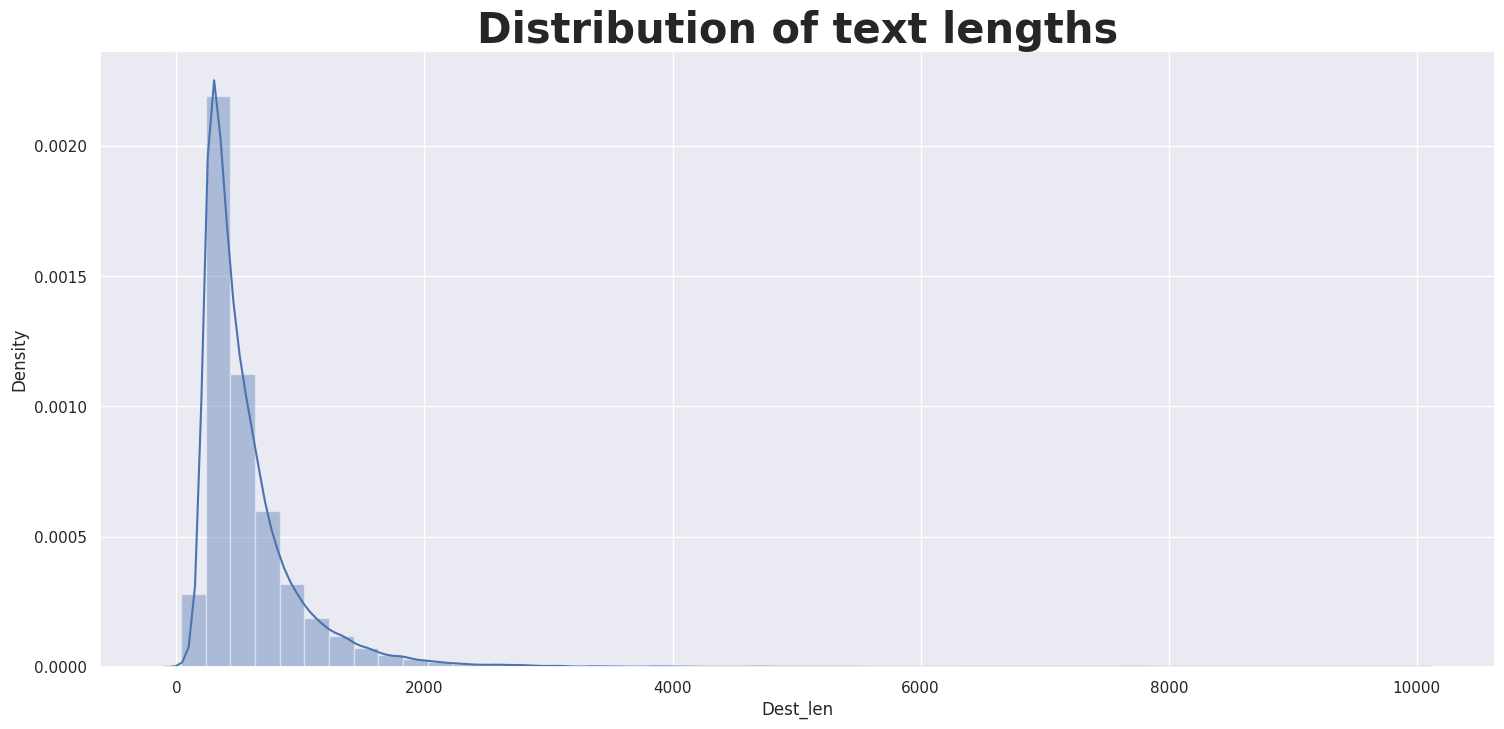

In [ ]:
train_data['Dest_len'] = train_data['Description'].apply(len)
sns.distplot(train_data['Dest_len'])
plt.title('Distribution of text lengths', fontweight='bold', fontsize=30)
plt.show()

### Distribution of Genre

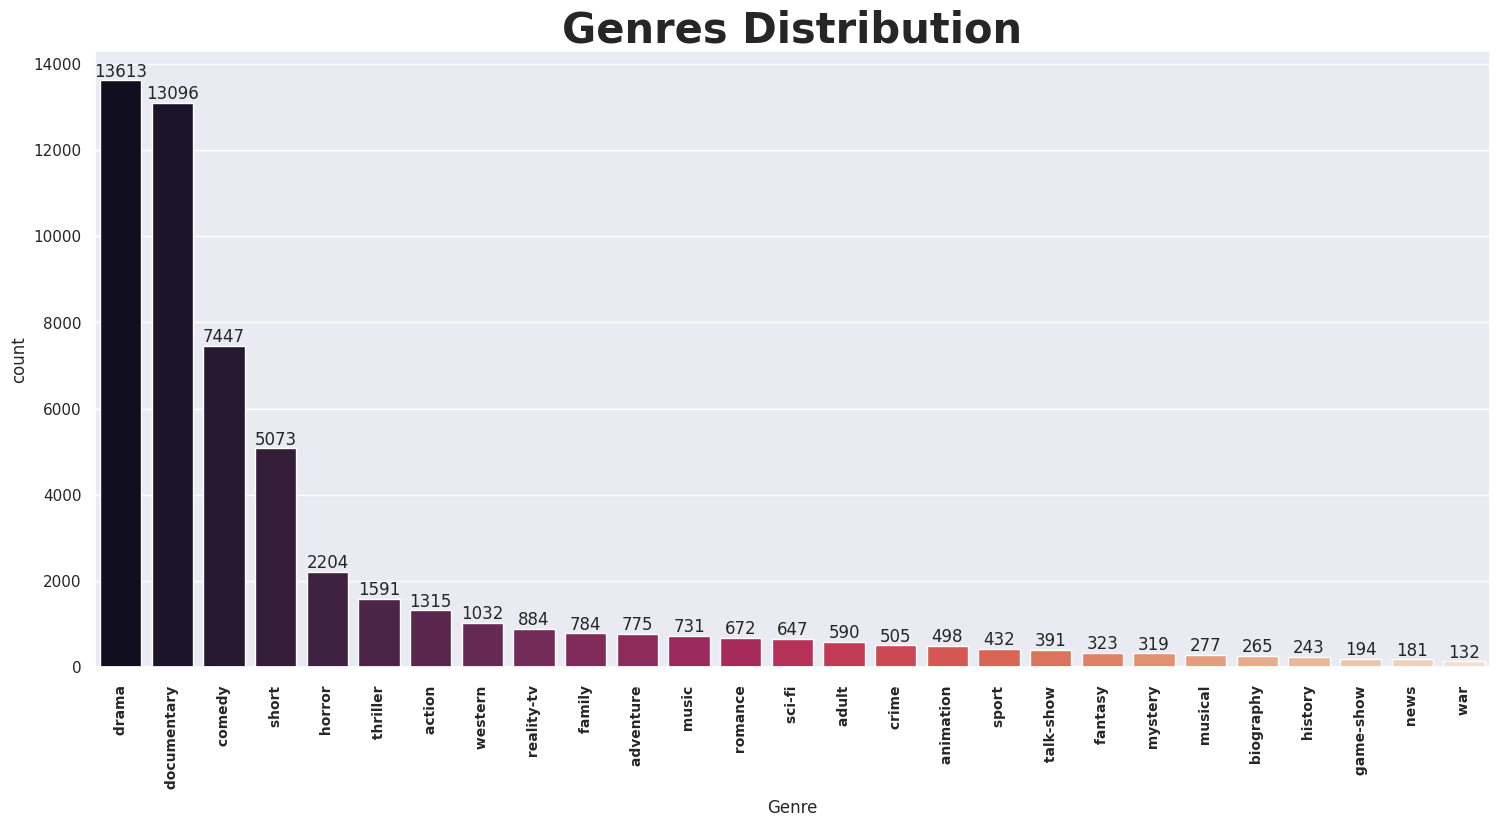

In [ ]:
ax = sns.countplot(data=train_data, x='Genre', order=train_data.Genre.value_counts().index, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution', fontweight='bold', fontsize=30)
plt.xticks(rotation=90, fontweight='bold', fontsize=10)
plt.show()

## **Model Building**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1,1), stop_words='english', min_df=2)

In [ ]:
X_train = tfidf.fit_transform(train_data['Description'])
X_test = tfidf.transform(test_data['Description'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
X_train_resampled, Y_train_resampled = sampler.fit_resample(X_train, train_data['Genre'])

In [ ]:
print('Train :', X_train_resampled.shape[0])
print('Test :',Y_train_resampled.shape[0])

Train : 367551
Test : 367551


In [ ]:
Y_test = pd.read_csv(r'/content/drive/MyDrive/Datasets/Genre Classification Dataset/test_data_solution.txt',
                     sep=':::',
                     usecols=[2],
                     header=None).rename(columns={2:'Actual_Genre'})

Y_test.head()

,Actual_Genre
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [ ]:
Y_train_modified = train_data['Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')
Y_test_modified = Y_test['Actual_Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')

## **Model Fitting**

In [ ]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.3)
nb.fit(X_train, Y_train_modified)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb, Y_test_modified)*100,2)
print(f"The accuracy score achieved using Naive Bayes is: {score_nb}")

The accuracy score achieved using Naive Bayes is: 69.05


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train_modified)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_nb, Y_test_modified)*100,2)
print(f"The accuracy score achieved using Logistic Regression is: {score_lr}")

The accuracy score achieved using Logistic Regression is: 69.05


## **Output final score**

In [ ]:
scores = [score_nb, score_lr]
algorithms = ['Naive Bayes','Logistic Regression']
for i in range(len(algorithms)):
  print(f"The accuracy score achieved using {algorithms[i]} is: {scores[i]}%")

The accuracy score achieved using Naive Bayes is: 69.05%
The accuracy score achieved using Logistic Regression is: 69.05%


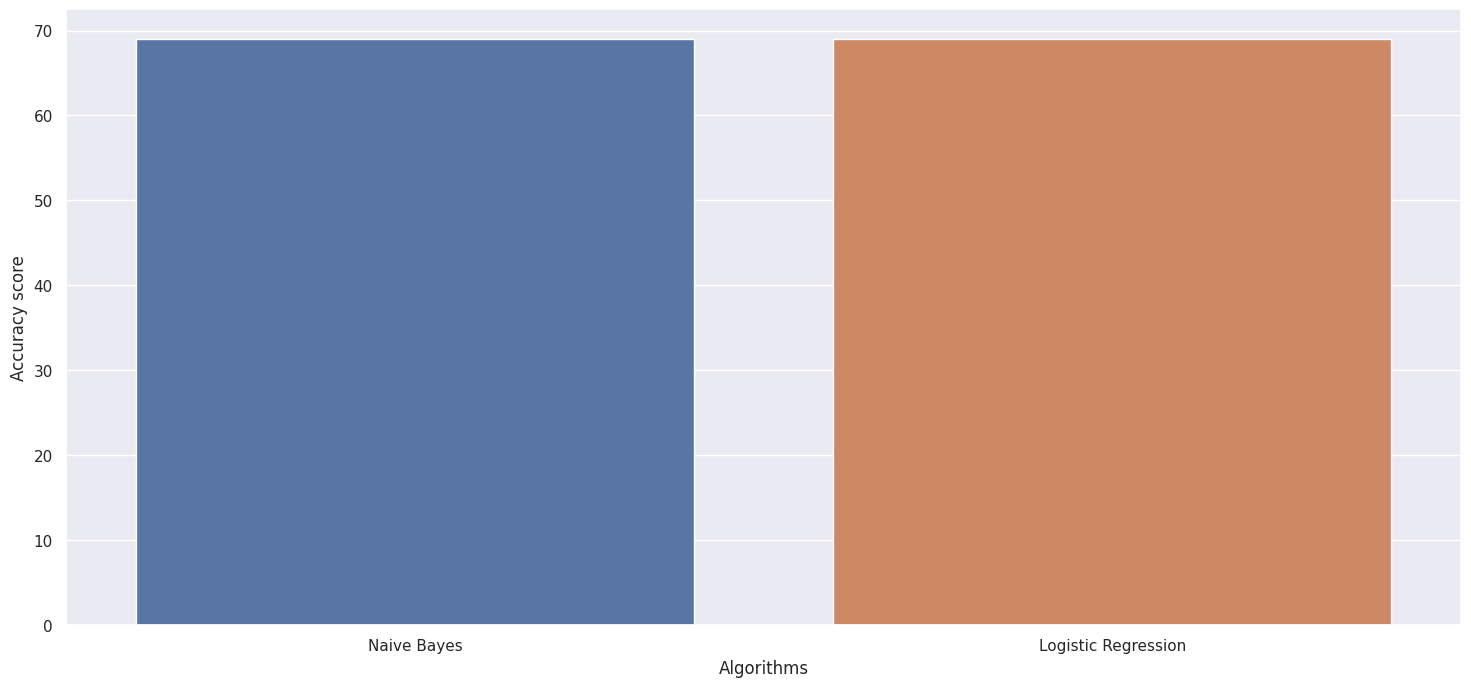

In [ ]:
sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()

Therefore, both Naive Bayes and Logistic Regression has good result.